<a href="https://colab.research.google.com/github/zerobbang/study_colab/blob/main/hongong/ch6_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습

- 지도 학습 -> 종속변수(타겟)
- 비지도 학습  -> 종속변수 X
  - 비지도 학습은 분류를 한다. 
  - 다중분류
  - 전제조건의 데이터가 많아야 한다.
  - 딥러닝 연관 (자연어 처리, 이미지)

### 데이터 처리

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 03:38:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 03:38:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 03:38:43--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- numpy 파일 불러오기

In [ ]:
import numpy as np
import pandas as pd

fruits = np.load("/content/fruits_300.npy")
print(fruits.shape)
print(fruits.ndim)

(300, 100, 100)
3


- 첫번째 차원(300) = 샘플의 개수
- 두번째 차원(100) = 이미지 높이
- 세번째 차원(100) = 이미지 너비
- 이미지 크기 100 x 100

In [ ]:
# frutits의 0번째 데이터 이미지의 너비
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

### 이미지 시각화


  - 흑백 사진
  - 0 ~ 225까지의 정숫값을 가진다.
  - 0 에 가까우면 어두움 / 255 에 가까우면 밝게 나타남

In [ ]:
# 0번재 이미지의 높이
fruits[0,:,0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 2, 3, 1, 2, 3,
       1, 1, 1, 2, 2, 2, 5, 2, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

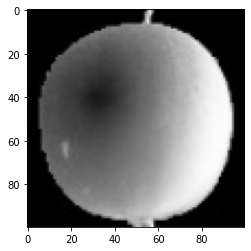

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(fruits[0], cmap = 'gray')

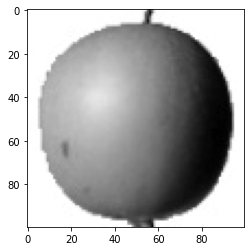

In [ ]:
# 반전
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

- 여러 이미지 시각화

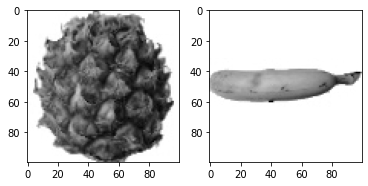

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap = 'gray_r')
axs[1].imshow(fruits[200],cmap = 'gray_r')

0 ~ 99 = apple / 100 ~ 199 = pineapple / 200 ~ 299 = banana

### 픽셀값 분석

- 과일 종류별로 묶어서 1차원 배열로 변환 ( 샘플 개수, 이미지 크기)

In [ ]:
apple = fruits[0:100].reshape(-1, 100 * 100)
pineapple = fruits[100:200].reshape(-1, 100 * 100)
banana = fruits[200:300].reshape(-1,100 * 100)

In [ ]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


- 각 이미지에 대한 픽셀 평균값 비교

In [ ]:
# axis =1 열
print(apple.mean(axis = 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


- 각 과일에 대한 히스토그램 작성
  - 히스토그램 : 값이 발생한 빈도를 그래프로 표시


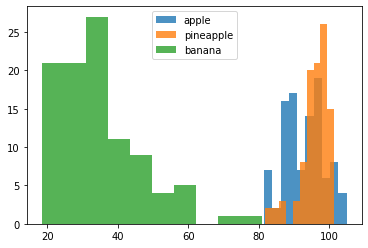

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

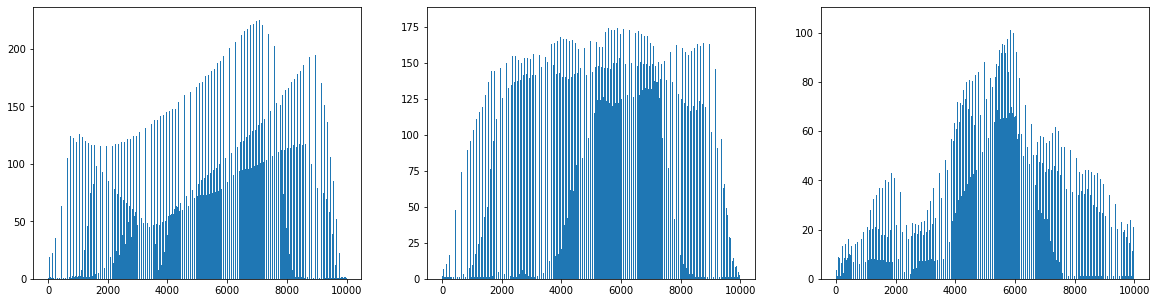

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

- 대표 이미지 (평균 낸 픽셀 값으로 뽑아내기)

In [ ]:
# 이미지 데이터를 1차원 배열로 나눴기 때문에 이미지화 하기 위해 다시 2차원 (너비 x 높이)로 바꿔준다.
apple_mean = np.mean(apple, axis = 0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100,100)
banana_mean = np.mean(banana, axis = 0).reshape(100,100)

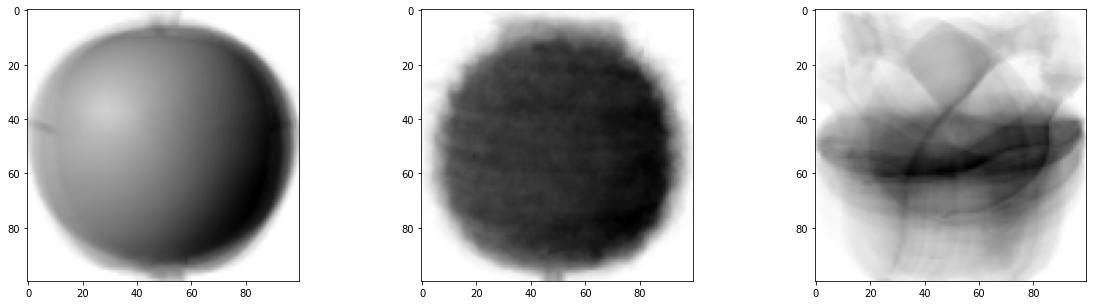

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')

- 평균값과 가까운 사진 고르기 (오차가 작은 값)
  - 이미지 너비, 높이기준으로 데이터의 오차 평균을 구했다.

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


-- 이미지의 너비와 높이를 합해서 평균내어 오차 하나의 값으로 추출한다. ( 평균 이미지와의 오차값 ) 

- 오차의 값이 가장 작은 순서대로 100개를 고른다.

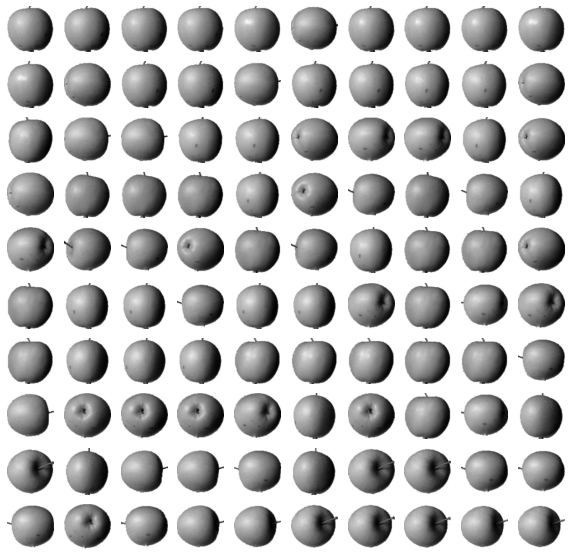

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
    # 이미지만 보이게 하기 위해 축 off
    axs[i,j].axis('off')
plt.show()

# K - 평균

**k - 평균 알고리즘**
-> 평균값 = cluster center = cetroid

- 3차원을 2차원으로

In [ ]:
fruits_2d = fruits.reshape(-1,100 * 100)
fruits_2d.shape

(300, 10000)

### k 알고리즘 활용

1. 무작위로 k개의 클러스터 중심 선정
2. 클러스터 중심과 가까운 샘플을 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 재선정
4. 클러스터 중심 변화 없을 때까지 2번 ~ 3번 과정 반복

- n_clusters = 클래스에서 설정할 매개변수 클러스터 개수 지정

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

-- 군집의 결과는 KMeans의 클래스 객치 labels_에 저장이 된다.

In [ ]:
# 모형 학습 후, labels
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


-- 군집의 결과 데이터 300개가 레이블 0,1,2로 분류가 되었다.

- label별 샘플의 개수 확인

In [ ]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


-- 0번 레이블 : 111개

-- 1번 레이블 : 98개

-- 2번 레이블 : 91개

- 그래프로 시각화 - 시각화 함수 만들어 수행

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    # 한 행에 10개씩 이미지를 넣어서 나오는 행의 개수 지정
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

--ratio 기본값  1

-- cols = n if rows < 2 else 10 해석 : 행마다 이미지를 넣어주는데 10개씩을 넣는다. 그런데 행이 2개 이상이 아닐때는 그때의 샘플 수 만큼만 넣는다.

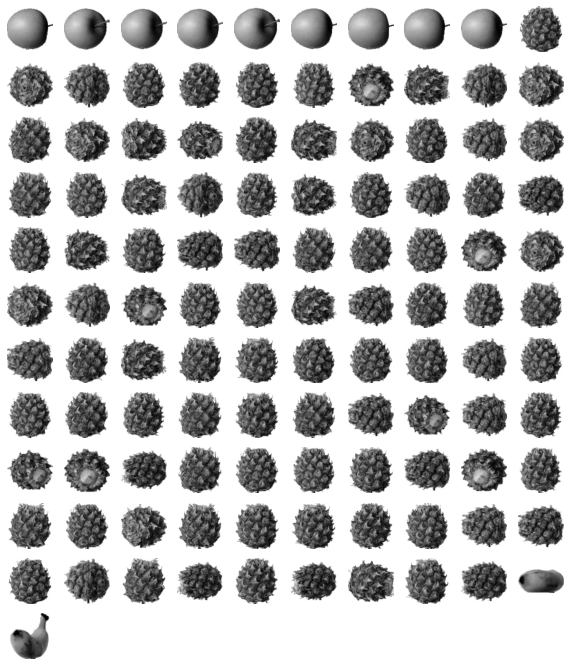

In [ ]:
draw_fruits(fruits[km.labels_==0])

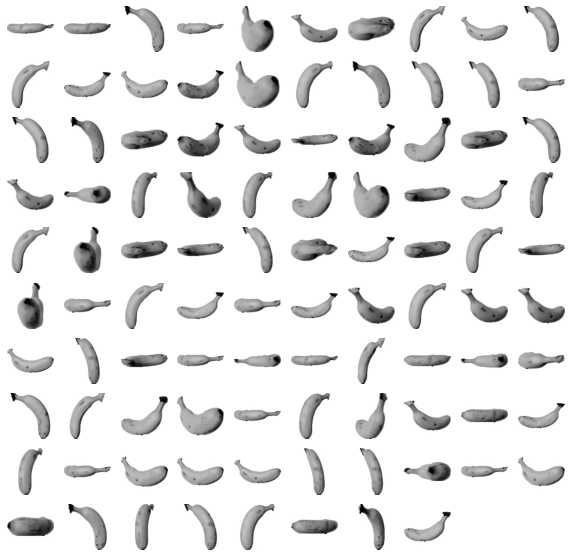

In [ ]:
draw_fruits(fruits[km.labels_==1])

### 클러스터 중심

- 다시 3차원 배열로 변환

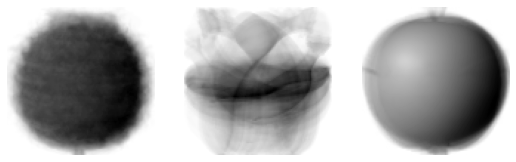

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100,100),ratio = 3)

In [ ]:
#  과일별 클러스터 중심까지와의 거리를 계산하여 어디에 속하는지 알 수 있다.
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
print(km.predict(fruits_2d[100:101]))
# pineapple

[0]


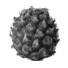

In [ ]:
draw_fruits(fruits[100:101])

- 최적의 k찾기

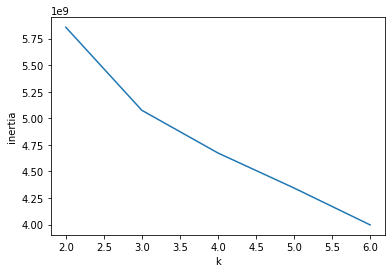

In [ ]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters = k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

-- 꺽인 점이 최적의 k이다.